In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import scale

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving cardio_train.csv to cardio_train.csv
User uploaded file "cardio_train.csv" with length 2941524 bytes


In [3]:
DATA_PATH = './cardio_train.csv' 
df = pd.read_csv(DATA_PATH, sep=';')
print(df.shape)
df.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# Data description

- age: in days
- gender:
 - 1: women
 - 2: men
- height: in cm
- weight: in kg
- ap_hi: Systolic blood pressure
- ap_lo: Diastolic blood pressure
- cholesterol:
 - 1: normal
 - 2: above normal
 - 3: well above normal
- gluc:
 - 1: normal
 - 2: above normal
 - 3: well above normal
- smoke: binary feature
- alco: binary feature
- active: binary feature
- cardio: target feature


In [4]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [0]:
df.drop(['id'], axis=1, inplace=True)

In [6]:
sum(df.isnull().sum(), df.isna().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
df = df.apply(lambda col: col / col.max())

In [9]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.821021,0.674786,0.657437,0.371028,0.008041,0.008785,0.455624,0.408819,0.088129,0.053771,0.803729,0.499700
std,0.104046,0.238419,0.032841,0.071979,0.009614,0.017134,0.226750,0.190757,0.283484,0.225568,0.397179,0.500003
min,0.455362,0.500000,0.220000,0.050000,-0.009363,-0.006364,0.333333,0.333333,0.000000,0.000000,0.000000,0.000000
25%,0.744908,0.500000,0.636000,0.325000,0.007491,0.007273,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000
50%,0.830894,0.500000,0.660000,0.360000,0.007491,0.007273,0.333333,0.333333,0.000000,0.000000,1.000000,0.000000
75%,0.899380,1.000000,0.680000,0.410000,0.008739,0.008182,0.666667,0.333333,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


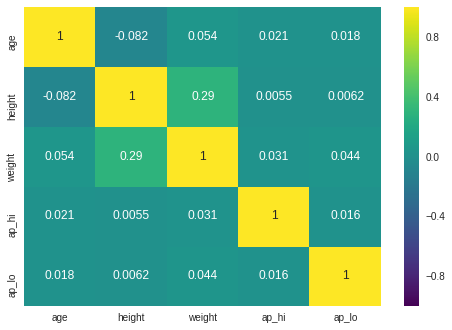

In [10]:
sns.heatmap(df.drop(axis=1, columns=['gender', 'smoke', 'alco', 'active', 'cardio', 'cholesterol', 'gluc']).corr(), annot=True, cmap='viridis')

(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

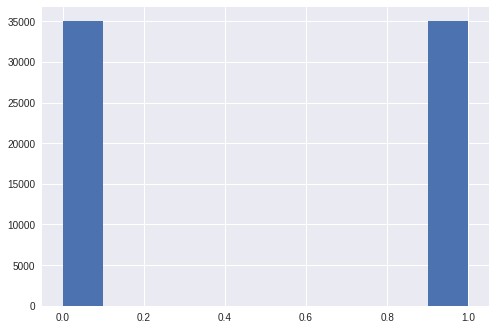

In [11]:
plt.hist(df.cardio)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


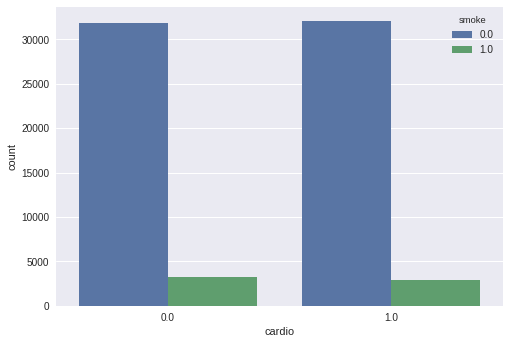

In [12]:
bin_features_list = ['gender', 'smoke', 'alco', 'active']

rest_df = df.drop(bin_features_list, axis=1)

bin_features = df[[*bin_features_list, 'cardio']]

sns.countplot(x="cardio", hue="smoke", data=bin_features)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


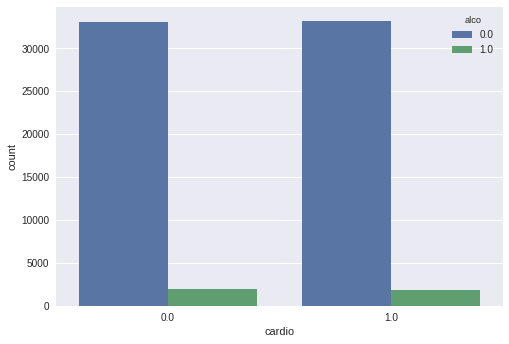

In [13]:
sns.countplot(x="cardio", hue="alco", data=bin_features)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


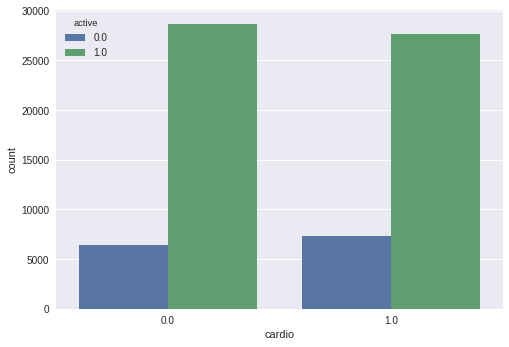

In [14]:
sns.countplot(x="cardio", hue="active", data=bin_features)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


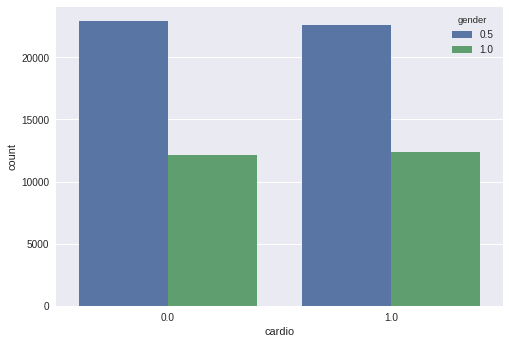

In [15]:
sns.countplot(x="cardio", hue="gender", data=bin_features)

In [16]:
rest_df.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,cardio
0,0.775650,0.672,0.310,0.006866,0.007273,0.333333,0.333333,0.0
1,0.853034,0.624,0.425,0.008739,0.008182,1.000000,0.333333,1.0
2,0.795218,0.660,0.320,0.008115,0.006364,1.000000,0.333333,1.0
3,0.743179,0.676,0.410,0.009363,0.009091,0.333333,0.333333,1.0
4,0.736895,0.624,0.280,0.006242,0.005455,0.333333,0.333333,0.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


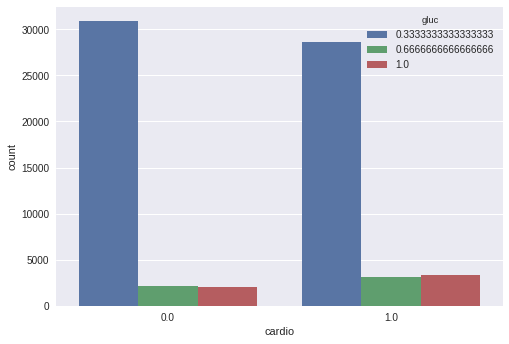

In [17]:
sns.countplot(x="cardio", hue="gluc", data=rest_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


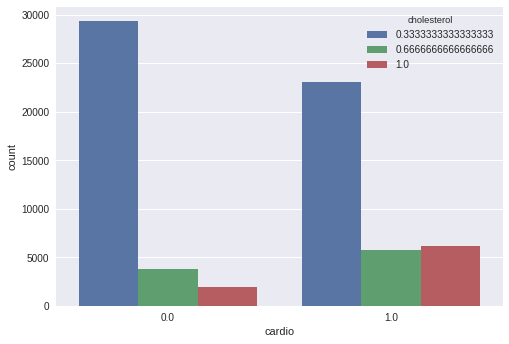

In [18]:
sns.countplot(x="cardio", hue="cholesterol", data=rest_df)

In [0]:
X = df.drop('cardio', axis=1)[['cholesterol', 'ap_lo', 'ap_hi', 'gluc']].values
y = df['cardio'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Comparing algorithms

## KNN

In [0]:
knn = KNeighborsClassifier()

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
knn.score(X_test, y_test)

0.7012142857142857

In [0]:
scores = cross_val_score(knn, X, y, cv=10)

print(f"Mean score: {scores.mean()} +/-({scores.std()})")

Mean score: 0.6947713314790067 +/-(0.032462723699001175)


## Decision Tree

In [0]:
tree_entropy = DecisionTreeClassifier(criterion='entropy')
tree_gini = DecisionTreeClassifier()

In [0]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
tree_entropy.score(X_test, y_test)

0.7271428571428571

In [0]:
scores = cross_val_score(tree_entropy, X, y, cv=10)

print(f"Mean score: {scores.mean()} +/-({scores.std()})")

Mean score: 0.721371425397376 +/-(0.00345912174495936)


In [0]:
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
tree_gini.score(X_test, y_test)

0.7272142857142857

In [0]:
scores = cross_val_score(tree_gini, X, y, cv=10)

print(f"Mean score: {scores.mean()} +/-({scores.std()})")

Mean score: 0.7213714294778426 +/-(0.003378805263199)


## Multi Layer Perceptron

In [47]:
! pip install rx

    100% |████████████████████████████████| 184kB 12.5MB/s 


In [0]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.optimizers import SGD, Adam
from sklearn.model_selection import StratifiedKFold
from functools import partial
from statistics import mean, stdev
from rx import Observable

In [0]:
def gen_model():
  input_l = Input(shape=(X.shape[-1], ))

  l1 = Dense(50, activation='relu', kernel_initializer='truncated_normal')(input_l)
  l2 = Dense(2, activation='softmax',  kernel_initializer='truncated_normal')(l1)

  model = Model(inputs=input_l, outputs=l2)
  model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
  
  return model

In [0]:
def run_train(X, y, data):
  train, test = data

  # convert data to categorical
  y_train = to_categorical(y[train])
  y_test = to_categorical(y[test])

  model = gen_model()
  model.fit(x=X[train], y=y_train, epochs=20)
 
  scores = model.evaluate(X[test], y_test, verbose=0)

  print(f"{model.metrics_names[1]:.4}: {scores[1] * 100:.4}%")

  return scores[1] * 100

In [0]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [64]:
y_train.shape

(56000, 2)

In [67]:
obs = Observable.from_(kfold.split(X, y))\
  .map(partial(run_train, X, y))\
  .to_list()\
  .subscribe(lambda scores: print(f"Mean score: {mean(scores):.4}% (+/- {stdev(scores):.4}%)"))

obs.dispose()

Epoch 1/20
62999/62999 [==============================] - 11s 182us/step - loss: 0.6694 - acc: 0.5833
Epoch 2/20
62999/62999 [==============================] - 9s 142us/step - loss: 0.6638 - acc: 0.5948
Epoch 3/20
62999/62999 [==============================] - 9s 148us/step - loss: 0.6617 - acc: 0.5950
Epoch 4/20
62999/62999 [==============================] - 9s 143us/step - loss: 0.6597 - acc: 0.5947
Epoch 5/20
62999/62999 [==============================] - 9s 142us/step - loss: 0.6571 - acc: 0.5976
Epoch 6/20
62999/62999 [==============================] - 9s 141us/step - loss: 0.6533 - acc: 0.6017
Epoch 7/20
62999/62999 [==============================] - 9s 141us/step - loss: 0.6480 - acc: 0.6161
Epoch 8/20
62999/62999 [==============================] - 9s 141us/step - loss: 0.6416 - acc: 0.6345
Epoch 9/20
62999/62999 [==============================] - 9s 140us/step - loss: 0.6355 - acc: 0.6583
Epoch 10/20
62999/62999 [==============================] - 9s 141us/step - loss: 0.6269 - 

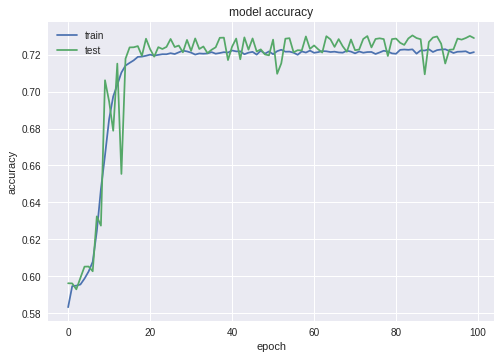

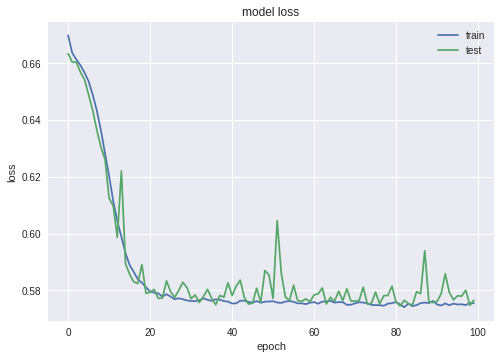

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()